# Task San Fransisco Permit

## Task A Cleaning
- Download the Building_Permits.csv from Kaggle 
- Clean the San Francisco Building permit dataset 
- Use imputation were necessary 


In [1]:
import numpy as np
import pandas as pd

In [2]:
# read in the San Francisco building permits data
sfPermits = pd.read_csv("./Building_Permits.csv")

# set seed for reproducibility
np.random.seed(0)

C:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (22,32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
sfPermits.sample(5)

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
40553,201403039652,8,otc alterations permit,03/03/2014,3732,008,400,NaN,Clementina,St,...,NaN,NaN,1.0,constr type 1,NaN,6.0,South of Market,94103.0,"(37.780460571778164, -122.40450626524974)",1334094491645
169731,201510159735,3,additions alterations or repairs,10/15/2015,2609,028,79,NaN,Buena Vista,Tr,...,5.0,wood frame (5),5.0,wood frame (5),NaN,8.0,Castro/Upper Market,94117.0,"(37.76757916496494, -122.43793170417105)",1399356139170
19180,M409787,8,otc alterations permit,07/22/2013,4624,031,178,NaN,West Point,Rd,...,NaN,NaN,NaN,NaN,NaN,10.0,Bayview Hunters Point,94124.0,"(37.73524725436046, -122.38063828309745)",1311685491725
68047,201411191888,8,otc alterations permit,11/19/2014,0039,109,294,NaN,Francisco,St,...,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,North Beach,94133.0,"(37.805257822817126, -122.40998545760392)",1362881288870
64238,M527228,8,otc alterations permit,10/14/2014,1251,002,707,NaN,Cole,St,...,NaN,NaN,NaN,NaN,NaN,5.0,Haight Ashbury,94117.0,"(37.76836885973765, -122.45074431487859)",135886493776


In [4]:
# Calculate total number of cells in dataframe
totalCells = np.product(sfPermits.shape)

# Count number of missing values per column
missingCount = sfPermits.isnull().sum()

# Calculate total number of missing values
totalMissing = missingCount.sum()

# Calculate percentage of missing values
print("The SF Permits dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

The SF Permits dataset contains 26.26 % missing values.


In [5]:
def getMissingPercent(dataSet):
    sums = dataSet.isnull().sum()
    return (sums/dataSet.shape[0]).sort_values(ascending=False)

missing_percent = getMissingPercent(sfPermits)
missing_percent

TIDF Compliance                           0.999990
Voluntary Soft-Story Retrofit             0.999824
Unit Suffix                               0.990141
Street Number Suffix                      0.988859
Site Permit                               0.973057
Structural Notification                   0.965199
Fire Only Permit                          0.905344
Unit                                      0.851790
Completed Date                            0.511357
Permit Expiration Date                    0.260835
Existing Units                            0.259115
Proposed Units                            0.255963
Existing Construction Type                0.218029
Existing Construction Type Description    0.218029
Proposed Construction Type                0.217004
Proposed Construction Type Description    0.217004
Number of Proposed Stories                0.215525
Number of Existing Stories                0.215103
Proposed Use                              0.213369
Existing Use                   

## Possible Solutions
- Remove all rows containing NaN values
- Remove all columns containing NaN values
- Fill in the gaps with new data
- Manually clean the dataset

### Solution 1: remove all rows containing NaN values

In [6]:
remRows = sfPermits.dropna()
remRows

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID


As you can see, this doesn't make any sense, as there would be no row left which contains data.

### Solution 2: remove all columns containing NaN values

In [7]:
remCols = sfPermits.dropna(axis=1)
remCols.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Name,Current Status,Current Status Date,Filed Date,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,Ellis,expired,12/21/2017,05/06/2015,1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,Geary,issued,08/03/2017,04/19/2016,1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,Pacific,withdrawn,09/26/2017,05/27/2016,1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,Pacific,complete,07/24/2017,11/07/2016,1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,Market,issued,12/01/2017,11/28/2016,144548169992


In [8]:
print("Columns in original dataset: %d \n" % sfPermits.shape[1])
print("Columns with na's dropped: %d" % remCols.shape[1])

Columns in original dataset: 43 

Columns with na's dropped: 12


This solution also doesn't make sense, as there would be too few columns left for data exploration.

### Solution 3: fill in the gaps with zeroes

In [9]:
imputeZeroes = sfPermits.fillna(method='ffill', axis=0).fillna("0")
print("Column count after filling the gaps: %d" % imputeZeroes.shape[1])
imputeZeroes.head()

Column count after filling the gaps: 43


,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,0,Ellis,St,...,3.0,constr type 3,0,0,0,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,0,Geary,St,...,3.0,constr type 3,0,0,0,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,0,Pacific,Av,...,1.0,constr type 1,1,constr type 1,0,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,0,Pacific,Av,...,5.0,wood frame (5),5,wood frame (5),0,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,0,Market,St,...,3.0,constr type 3,5,wood frame (5),0,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992


Now we would have no more NaN values left, but the data doesn't make sense anymore, so we should try to fill it with some reliable data.

### Solution 4: manually clean the dataset

In [10]:
#First of all, let's drop all columns with at least 50% missing data

missing_percent.head(10)

TIDF Compliance                  0.999990
Voluntary Soft-Story Retrofit    0.999824
Unit Suffix                      0.990141
Street Number Suffix             0.988859
Site Permit                      0.973057
Structural Notification          0.965199
Fire Only Permit                 0.905344
Unit                             0.851790
Completed Date                   0.511357
Permit Expiration Date           0.260835
dtype: float64

If we take a closer look at "Voluntary Soft-Story Retrofit", "Site Permit" and "Fire Only Permit" we can see, that these columns contain Y (yes) or NaN (no) so we are going to fill the values correspondingly with 1 and 0.

In [11]:
sfPermits['Voluntary Soft-Story Retrofit'] = np.where(sfPermits['Voluntary Soft-Story Retrofit']=='Y', 1, 0)
sfPermits['Voluntary Soft-Story Retrofit'] = pd.to_numeric(sfPermits['Voluntary Soft-Story Retrofit'])

sfPermits['Site Permit'] = np.where(sfPermits['Site Permit']=='Y', 1, 0)
sfPermits['Site Permit'] = pd.to_numeric(sfPermits['Site Permit'])

sfPermits['Fire Only Permit'] = np.where(sfPermits['Fire Only Permit']=='Y', 1, 0)
sfPermits['Fire Only Permit'] = pd.to_numeric(sfPermits['Fire Only Permit'])



In [12]:
sfPermitsCopy = sfPermits.copy()

def dropColumn(columnName):
    sfPermitsCopy.drop(columnName, axis=1, inplace=True)
    

In [13]:
missing_percent = getMissingPercent(sfPermits)

for i in range(len(missing_percent)):
    if missing_percent[i] > 0.5:
        dropColumn(missing_percent.index[i])
    else:
        break

In [14]:
print("Column count after removing those columns: %d" % sfPermitsCopy.shape[1])

Column count after removing those columns: 37


In [15]:
sfPermitsCopy.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Name,Street Suffix,Description,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,Ellis,St,"ground fl facade: to erect illuminated, electr...",...,3.0,constr type 3,NaN,NaN,0,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,Geary,St,remove (e) awning and associated signs.,...,3.0,constr type 3,NaN,NaN,0,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,Pacific,Av,installation of separating wall,...,1.0,constr type 1,1.0,constr type 1,0,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,Pacific,Av,repair dryrot & stucco at front of bldg.,...,5.0,wood frame (5),5.0,wood frame (5),0,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,Market,St,demolish retail/office/commercial 3-story buil...,...,3.0,constr type 3,NaN,NaN,0,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992


In [16]:
print(getMissingPercent(sfPermitsCopy))

Permit Expiration Date                    0.260835
Existing Units                            0.259115
Proposed Units                            0.255963
Existing Construction Type Description    0.218029
Existing Construction Type                0.218029
Proposed Construction Type Description    0.217004
Proposed Construction Type                0.217004
Number of Proposed Stories                0.215525
Number of Existing Stories                0.215103
Proposed Use                              0.213369
Existing Use                              0.206707
Estimated Cost                            0.191383
Plansets                                  0.187577
First Construction Document Date          0.075143
Issued Date                               0.075113
Revised Cost                              0.030498
Street Suffix                             0.013917
Neighborhoods - Analysis Boundaries       0.008673
Supervisor District                       0.008632
Zipcode                        

In [17]:
#There are some more columns we can delete, as they are not important for the model

more_columns_to_delete = [
    'Existing Construction Type Description', #Just a description
    'Proposed Construction Type Description', #Also
    'Location', #Geocoordinates, ZIP code is better usable
    'Description', #Another description
    'Permit Type Definition', #Better use the permit type (numerical)
    'Permit Number', #Just a number without important semantic
    'Record ID' #Same reason as permit number                         
]

for column in more_columns_to_delete:
    dropColumn(column)
    
print("Column count after removing those columns: %d" % sfPermitsCopy.shape[1])

Column count after removing those columns: 30


In [18]:
# Now that we've got a clean dataset, we can start to impute missing values
# For the empty columns containing existing values we are going to use the proposed ones and drop the columns afterwards

sfPermitsCopy['Existing Use'].fillna(sfPermitsCopy['Proposed Use'], inplace=True)
sfPermitsCopy['Existing Units'].fillna(sfPermitsCopy['Proposed Units'], inplace=True)
sfPermitsCopy['Existing Construction Type'].fillna(sfPermitsCopy['Proposed Construction Type'], inplace=True)
sfPermitsCopy['Number of Existing Stories'].fillna(sfPermitsCopy['Number of Proposed Stories'], inplace=True)

sfPermitsCopy.drop('Proposed Use', axis = 1, inplace= True)
sfPermitsCopy.drop('Proposed Units', axis = 1, inplace= True)
sfPermitsCopy.drop('Proposed Construction Type', axis = 1, inplace= True)
sfPermitsCopy.drop('Number of Proposed Stories', axis = 1, inplace= True)


In [19]:
pd.set_option('display.max_columns', 500)
sfPermitsCopy.sample(10)

,Permit Type,Permit Creation Date,Block,Lot,Street Number,Street Name,Street Suffix,Current Status,Current Status Date,Filed Date,Issued Date,First Construction Document Date,Number of Existing Stories,Voluntary Soft-Story Retrofit,Fire Only Permit,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Plansets,Existing Construction Type,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode
60635,3,09/10/2014,0479,027,1356,Chestnut,St,issued,05/04/2016,09/10/2014,05/04/2016,05/04/2016,3.0,0,0,04/29/2017,45000.0,45000.0,apartments,3.0,2.0,5.0,1,2.0,Marina,94123.0
110430,8,01/04/2016,1276,001H,202,Grattan,St,complete,05/13/2016,01/04/2016,01/04/2016,01/04/2016,3.0,0,0,12/29/2016,45283.0,45283.0,apartments,4.0,0.0,5.0,0,5.0,Haight Ashbury,94117.0
165042,3,07/21/2017,3622,004,818,Noe,St,filed,07/21/2017,07/21/2017,NaN,NaN,3.0,0,0,NaN,20000.0,NaN,1 family dwelling,1.0,2.0,5.0,1,8.0,Noe Valley,94114.0
79200,8,03/17/2015,1509,009,547,35th,Av,issued,03/31/2015,03/17/2015,03/31/2015,03/31/2015,2.0,0,0,03/25/2016,7000.0,9000.0,1 family dwelling,1.0,2.0,5.0,0,1.0,Outer Richmond,94121.0
76487,8,02/20/2015,1923,023,1662,21st,Av,complete,03/10/2015,02/20/2015,02/20/2015,02/20/2015,2.0,0,0,02/15/2016,1000.0,1000.0,1 family dwelling,1.0,0.0,5.0,0,4.0,Sunset/Parkside,94122.0
103125,8,10/21/2015,0738,049,851,Van Ness,Av,issued,10/21/2015,10/21/2015,10/21/2015,10/21/2015,6.0,0,0,10/15/2016,17500.0,17500.0,apartments,32.0,0.0,3.0,0,5.0,Western Addition,94109.0
109832,8,12/23/2015,0818,046,488,Fell,St,filed,12/23/2015,12/23/2015,NaN,NaN,3.0,0,0,NaN,4000.0,4000.0,retail sales,2.0,2.0,5.0,0,5.0,Hayes Valley,94102.0
47606,8,05/12/2014,5523,007,3240,Folsom,St,complete,05/14/2015,05/12/2014,05/12/2014,05/12/2014,2.0,0,0,05/07/2015,8032.0,8032.0,2 family dwelling,2.0,0.0,5.0,0,9.0,Bernal Heights,94110.0
87148,8,05/29/2015,2823A,017,5,Gladeview,Wy,issued,05/29/2015,05/29/2015,05/29/2015,05/29/2015,2.0,0,0,05/23/2016,6000.0,21000.0,1 family dwelling,1.0,2.0,5.0,0,7.0,Twin Peaks,94131.0
35831,8,01/08/2014,1857,030,1526,12th,Av,issued,01/08/2014,01/08/2014,01/08/2014,01/08/2014,2.0,0,0,01/03/2015,12000.0,12000.0,1 family dwelling,1.0,0.0,5.0,0,7.0,Inner Sunset,94122.0


In [20]:
# Afterwards we are going to fill numerical values with the mean and character values with the mode of the dataset

mean = [
    'Revised Cost',
    'Estimated Cost'
]

for column in mean:
    sfPermitsCopy[column].fillna(sfPermitsCopy[column].mean(skipna=True), inplace=True)

mode = [
    'Existing Construction Type',
    'Existing Units',
    'Existing Use',
    'Plansets',
    'Number of Existing Stories',
]

for column in mode:
    sfPermitsCopy[column].fillna(sfPermitsCopy[column].mode()[0], inplace = True)


In [21]:
#Lastly we drop all rows still containing NaN values. There should be enough rows left to do some exploration

clean_dataset = sfPermitsCopy.copy()
clean_dataset = clean_dataset.dropna()

print("Rows left: %d" % len(clean_dataset))

Rows left: 143814


In [22]:
print(getMissingPercent(clean_dataset))

Zipcode                                0.0
Neighborhoods - Analysis Boundaries    0.0
Permit Creation Date                   0.0
Block                                  0.0
Lot                                    0.0
Street Number                          0.0
Street Name                            0.0
Street Suffix                          0.0
Current Status                         0.0
Current Status Date                    0.0
Filed Date                             0.0
Issued Date                            0.0
First Construction Document Date       0.0
Number of Existing Stories             0.0
Voluntary Soft-Story Retrofit          0.0
Fire Only Permit                       0.0
Permit Expiration Date                 0.0
Estimated Cost                         0.0
Revised Cost                           0.0
Existing Use                           0.0
Existing Units                         0.0
Plansets                               0.0
Existing Construction Type             0.0
Site Permit

In [23]:
clean_dataset.to_csv("./Building_Permits_Clean.csv")
clean_dataset.sample(10)

,Permit Type,Permit Creation Date,Block,Lot,Street Number,Street Name,Street Suffix,Current Status,Current Status Date,Filed Date,Issued Date,First Construction Document Date,Number of Existing Stories,Voluntary Soft-Story Retrofit,Fire Only Permit,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Plansets,Existing Construction Type,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode
100220,8,09/25/2015,0330,026,55,Cyril Magnin,St,issued,09/25/2015,09/25/2015,09/25/2015,09/25/2015,32.0,0,1,09/19/2016,600.0,600.0,tourist hotel/motel,1005.0,2.0,1.0,0,3.0,Tenderloin,94102.0
141698,8,11/04/2016,0834,004,25,Van Ness,Av,issued,12/20/2016,11/04/2016,12/20/2016,12/20/2016,8.0,0,0,12/15/2017,25000.0,25000.0,office,0.0,2.0,1.0,0,5.0,Hayes Valley,94102.0
39057,8,02/13/2014,0182,021,1540,Jones,St,complete,02/02/2015,02/13/2014,02/14/2014,02/14/2014,3.0,0,0,02/09/2015,3500.0,4500.0,apartments,15.0,2.0,5.0,0,3.0,Nob Hill,94133.0
101329,8,10/06/2015,0952,020,2850,Divisadero,St,issued,10/13/2015,10/06/2015,10/13/2015,10/13/2015,4.0,0,0,10/07/2016,20000.0,50000.0,1 family dwelling,1.0,2.0,5.0,0,2.0,Marina,94123.0
13573,8,05/23/2013,6602,035,437,Duncan,St,issued,05/23/2013,05/23/2013,05/23/2013,05/23/2013,1.0,0,0,05/18/2014,100.0,100.0,1 family dwelling,1.0,0.0,5.0,0,8.0,Noe Valley,94131.0
85831,8,05/15/2015,3749,002,326,01st,St,issued,09/29/2015,05/15/2015,09/29/2015,09/29/2015,2.0,0,0,09/13/2018,195000.0,267300.0,food/beverage hndlng,1.0,2.0,3.0,0,6.0,Financial District/South Beach,94105.0
92216,8,07/15/2015,1726,039,1222,25th,Av,complete,10/12/2016,07/15/2015,07/17/2015,07/17/2015,3.0,0,0,07/11/2016,35000.0,35000.0,2 family dwelling,2.0,2.0,5.0,0,4.0,Sunset/Parkside,94122.0
106302,7,11/17/2015,0290,012,532,Market,St,issued,08/08/2016,11/17/2015,08/08/2016,08/08/2016,2.0,0,0,08/03/2017,1200.0,1200.0,1 family dwelling,1.0,2.0,5.0,0,3.0,Financial District/South Beach,94104.0
167613,8,08/01/2017,2658,045,3051,Market,St,complete,08/03/2017,08/01/2017,08/01/2017,08/01/2017,3.0,0,0,12/01/2017,1.0,1.0,apartments,3.0,0.0,5.0,0,8.0,Castro/Upper Market,94114.0
75020,8,02/05/2015,0493,004,1912,Lombard,St,issued,02/05/2015,02/05/2015,02/05/2015,02/05/2015,3.0,0,0,01/31/2016,3000.0,3000.0,1 family dwelling,4.0,0.0,5.0,0,2.0,Marina,94123.0


In the end we were able to clean the dataset with a loss of ~25% of data. In the next step the data should be explored more and therefore further changes have to be done.

## Task B Exploration
- Explore the data. Which columns correlate strongly with the "Current Status" column? How do other columns correlate to each other? 
- Describe problems with "Current Status" as a target column to predict. Can you construct a better target column?

In [24]:
# More imports

import matplotlib.pyplot as plt
import seaborn as sns

#Supress warnings
pd.options.mode.chained_assignment = None

In [25]:
#First of all we are going to split the data fields into years, months and days

date_columns = [
    'Permit Creation Date',
    'Current Status Date',
    'Filed Date',
    'Issued Date',
    'First Construction Document Date',
    'Permit Expiration Date'
]

def splitDates(column):
    name = column[0:-4]
    clean_dataset[name+'Year'] = clean_dataset[column].astype(str).str[-4:]
    clean_dataset[name+'Year'] = pd.to_numeric(clean_dataset[name+'Year'], errors='coerce')
    clean_dataset[name+'Day'] = clean_dataset[column].astype(str).str[3:5]
    clean_dataset[name+'Day'] = pd.to_numeric(clean_dataset[name+'Day'], errors='coerce')
    clean_dataset[name+'Month'] = clean_dataset[column].astype(str).str[0:2]
    clean_dataset[name+'Month'] = pd.to_numeric(clean_dataset[name+'Month'], errors='coerce')
    
for column in date_columns:
    splitDates(column)

for column in date_columns:
    clean_dataset.drop(column, axis = 1, inplace=True)


In [26]:
clean_dataset['Current Status'].value_counts()

complete      94905
issued        45707
expired        1341
cancelled      1182
reinstated      446
suspend         175
revoked          49
approved          7
withdrawn         1
incomplete        1
Name: Current Status, dtype: int64

### Construct a better target column

The column "Current Status" is not a good target column to predict due to the fact that there are too many status which could mean the same. So we are going to manually categorize these values.

As we can see, there are multiple versions to name the current status. There are two possibilites to express the status finished and even eight versions to show that it is not yet finished. That is a problem because there are actually several ways to express the same which makes it very hard to work with the data.

Therefore we have changed current status to an int value.

- 1 means status finished
- 0 means status not finished

This is how we created a variable which is suitable for predictions. We have lost some accuracy which means that we can not differ exactly if it is expired or cancelled. For differentiate the data more exactly we could have created one or two more variables with 2 and 3 as an int value but for this case the distinction between finished or not should be sufficient. But it makes it possible to work with the given data.

In [27]:
permitted_status = [
    'complete',
    'approved'
]

withdrawn_status = [
    'issued',
    'expired',
    'cancelled',
    'reinstated',
    'suspend',
    'revoked',
    'incomplete',
    'withdrawn'
]

In [28]:
for status in permitted_status:
    clean_dataset['Current Status'].replace(to_replace=status, value='1', inplace=True)
    
for status in withdrawn_status:
    clean_dataset['Current Status'].replace(to_replace=status, value='0', inplace=True)

In [29]:
#Change data type
clean_dataset['Current Status'] = pd.to_numeric(clean_dataset['Current Status'])
clean_dataset['Current Status'].value_counts()

1    94912
0    48902
Name: Current Status, dtype: int64

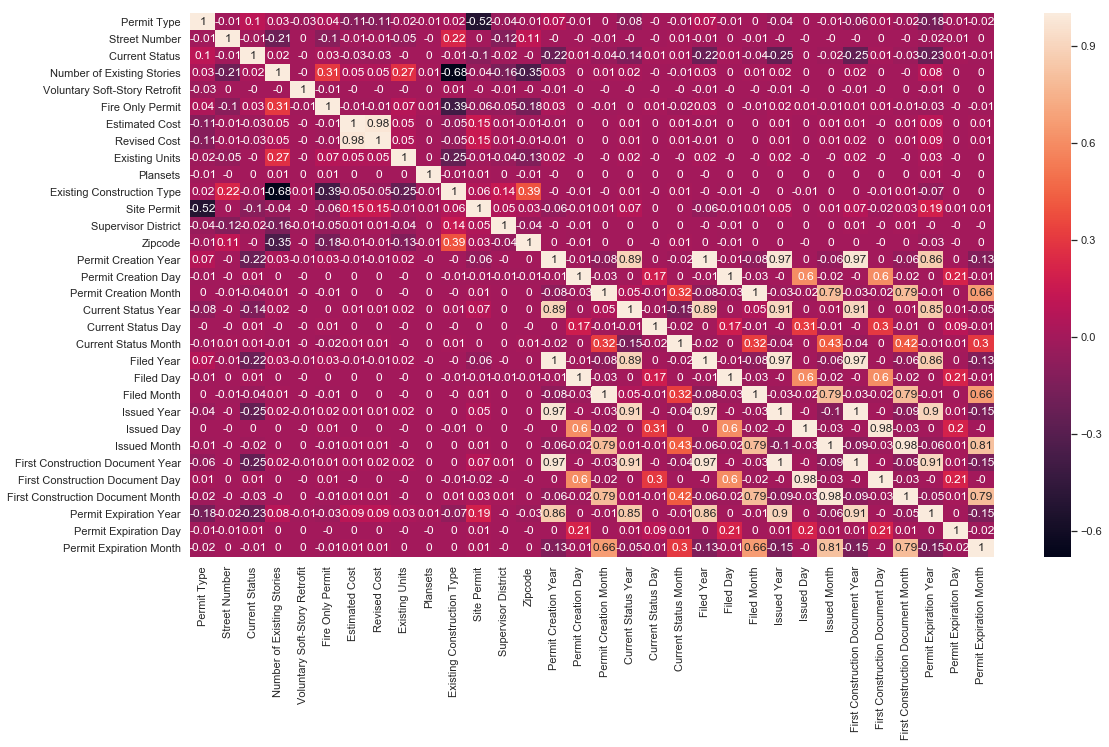

In [30]:
sns.set(rc={'figure.figsize':(18,10)})
correlation_matrix = clean_dataset.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)


Positive correlation means that there is a linear relation between two variables. 
Negative correlation means that two variables exclude each other.  
Classification of linear relation: 

- 1 = perfect
- 0,8 < 1 = very strong  
- 0,6 < 0,8 = strong 
- 0,4 < 0,6 = medium
- 0,2 < 0,4 = weak 
- 0,2 >   0 = very weak
- 0 = no relation 

The correlation matrix visualizes the connections between each columns. Obviously Current status does not have any other columns with which it correlates very well. The highest correlation for current status is 'Issued Year', but it is still very low with a value of -0,25.

Here we can see if one can talk about 'stronger' realtions in this case, the date seems to be in relation with Current status, as there are still the highest values of correlation given.

When we look at the classification above, current status only includes weak or very weak correaltion which means that a significant analysis about this column is not possible. We can only say that current status seems to be very neutral towards other columns.

In the following there will be some more detailed plots regarding only one correlation.

In [73]:
# Define a function to show the correlation of two given columns

sns.set(rc={'figure.figsize':(6,3)})

def showCorrelation(column1, column2):
    avg = clean_dataset[[column1,column2]].groupby(column1,as_index=False).mean()
    sns.barplot(x=column1, y=column2, data=avg, color="LightSeaGreen")
    plt.show()
    corr = clean_dataset[column1].corr(clean_dataset[column2],method ='pearson')
    print("Correlation between " + column1 + " and " + column2 + " is: "+ str(corr))

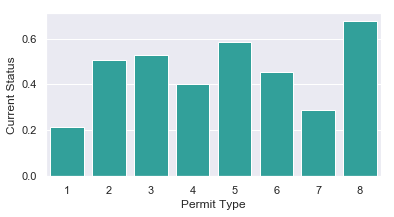

Correlation between Permit Type and Current Status is: 0.10424311981291584


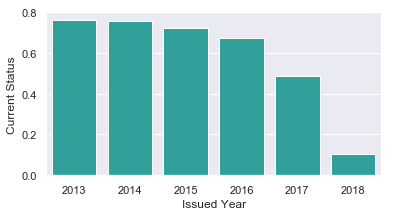

Correlation between Issued Year and Current Status is: -0.24644254181111003


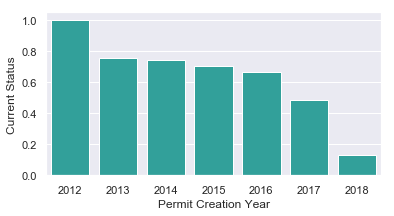

Correlation between Permit Creation Year and Current Status is: -0.2222906403098325


In [75]:
showCorrelation('Permit Type', 'Current Status')
showCorrelation('Issued Year', 'Current Status')
showCorrelation('Permit Creation Year', 'Current Status')

### Other correlations

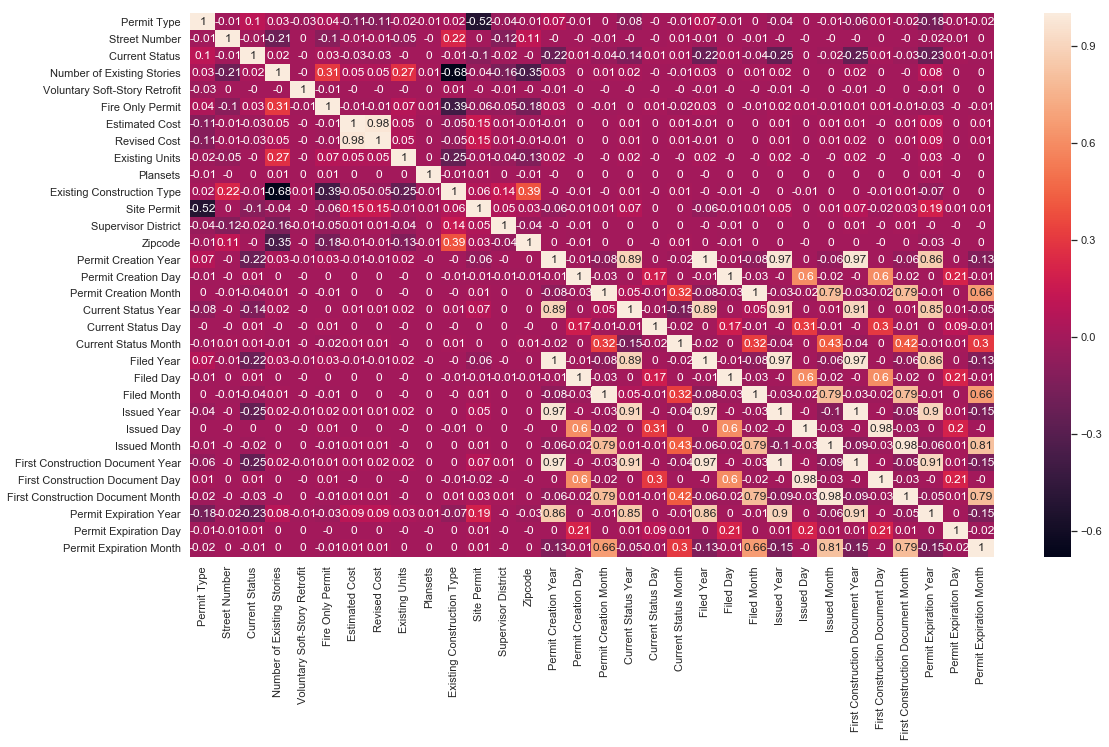

In [77]:
sns.set(rc={'figure.figsize':(18,10)})
correlation_matrix = clean_dataset.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)


Aside from Current status, there are definelty more meaningful correlations. Here are the top three for each positive and negative correlation: 

positive: 
- Revised Cost & Estimated Cost: 0,98
- Permit Creation Year & Current Status Year: 0,89
- Zipcode & Existing Construction Type: 0,39

negative: 
- Number of Existing Stories & Existing Construction Type: -0,68
- Zipcode & Number of Existing Stories: -0,35
- Existing Units & Existing Construction Type: -0,25

But it is also striking that there are lots of correlation near zero which means that they do not correlate at all. 
In total the whole data set does not show lots of correlations and even if it does they are usually quite week. 

## Task C Prediction
- Predict the "Current Status" or your substitute column from B from the other columns.
- Drop unessecary columns 
- Construct one-hot encoded dummy columns 
- Choose the Predictor of your choice

In [33]:
# More imports

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [34]:
clean_dataset.sample()

,Permit Type,Block,Lot,Street Number,Street Name,Street Suffix,Current Status,Number of Existing Stories,Voluntary Soft-Story Retrofit,Fire Only Permit,Estimated Cost,Revised Cost,Existing Use,Existing Units,Plansets,Existing Construction Type,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Permit Creation Year,Permit Creation Day,Permit Creation Month,Current Status Year,Current Status Day,Current Status Month,Filed Year,Filed Day,Filed Month,Issued Year,Issued Day,Issued Month,First Construction Document Year,First Construction Document Day,First Construction Document Month,Permit Expiration Year,Permit Expiration Day,Permit Expiration Month
104678,8,1453,035,338,22nd,Av,0,3.0,0,0,15000.0,34880.0,2 family dwelling,2.0,0.0,5.0,0,1.0,Outer Richmond,94121.0,2015,3,11,2015,3,11,2015,3,11,2015,3,11,2015,3,11,2016,28,10


In [55]:
# Construct one hot encoded columns

categorical_columns = [
    'Permit Type',
    'Existing Use',
    'Existing Construction Type',
    'Voluntary Soft-Story Retrofit',
    'Fire Only Permit',
    'Site Permit',
    'Neighborhoods - Analysis Boundaries',
    'Permit Creation Year', 'Permit Creation Day', 
    'Permit Creation Month', 'Current Status Year', 'Current Status Day', 'Current Status Month', 
    'Filed Year','Filed Day','Filed Month','Issued Year',
    'Issued Day','Issued Month','First Construction Document Year',
    'First Construction Document Day','First Construction Document Month','Permit Expiration Year',
    'Permit Expiration Day', 'Permit Expiration Month'
    
]

clean_dataset_dummys = pd.get_dummies(clean_dataset, columns = categorical_columns)


In [56]:
# Remove all columns containing characters

X = clean_dataset_dummys.drop([
    'Current Status',
    'Block', 
    'Lot', 
    'Street Number', 
    'Street Name', 
    'Street Suffix' 
] , axis=1)

y = clean_dataset_dummys['Current Status']

print(X.shape)
print(y.shape)

(143814, 463)
(143814,)


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Test with Linear Regression

In [58]:
from sklearn.linear_model import LinearRegression 

model = LinearRegression() 
model.fit(X_train, y_train)
Y_pred = model.predict(X_test)

In [59]:
model.score(X_test, y_test)

-5.493304472841765

Note (source https://stats.stackexchange.com/)

R2  compares the fit of the chosen model with that of a horizontal straight line (the null hypothesis). If the chosen model fits worse than a horizontal line, then R2 is negative. Note that R2 is not always the square of anything, so it can have a negative value without violating any rules of math. R2 is negative only when the chosen model does not follow the trend of the data, so fits worse than a horizontal line.

### Test with Logistic Regression

In [60]:
lr_saga = LogisticRegression(solver = "saga", n_jobs= -1)
lr_newton = LogisticRegression(solver ="newton-cg", n_jobs= -1)
lr_saga.fit(X_train, y_train)
lr_newton.fit(X_train, y_train)
saga_pred = lr_saga.predict(X_test)
newton_pred = lr_newton.predict(X_test)

C:\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [68]:
from sklearn.metrics import accuracy_score

print("Accuracy saga: {}".format(accuracy_score(saga_pred, y_test)))
print("Accuracy newton-cg: {}".format(accuracy_score(newton_pred, y_test)))

Accuracy saga: 0.6600301309537606
Accuracy newton-cg: 0.8056785259010314


### Testing with LinearSVC

In [62]:
from sklearn.svm import LinearSVC

svc = LinearSVC()
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)

C:\anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [63]:
from sklearn.feature_selection import SelectKBest

kbest = SelectKBest(k = 35)
kbest.fit(X_train, y_train)
X_t_train = kbest.transform(X_train)
X_t_test = kbest.transform(X_test)

C:\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 32  38  73  88  90 217] are constant.
  UserWarning)
C:\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [64]:
svc.fit(X_t_train, y_train)
svc_pred_kbest = clf.predict(X_t_test)

In [67]:
print("Accuracy of all data: {}".format(accuracy_score(svc_pred, y_test)))
print("Accuracy of SelectKBest data: {}".format(accuracy_score(svc_pred_kbest, y_test)))

Accuracy of all data: 0.3408274423455789
Accuracy of SelectKBest data: 0.7157492177540851


We tried to fit three different models for the dataset. As you can see above, the linear regression model didn't work at all and scored in a negative value range. For logistic regression we used two different solvers to see if one of them performs better than the other one. In our scenario, the newton-cg solver performed best with an accuracy of ~80%. 
Thirdly we tried to test the data with the linear svc (support vector machines) model. We also used for the selection of the best features the "selectkbest" method, which tries to fit the model with the columns which have the highest influence on the training. But linear svc also didn't perform well, even though there was a huge difference between the selectkbest method and using all data of the dataset.

## Task D Challenges
- Describe challenges you faced during A, B and C and how you solved it.


We had several challenges which we came across in task A to C. Here are some of them: 

#### 1. Which data is definetly necessary for our examination of the data: 

In the beginning it was quite hard to say which columns should be kept and which can be kicked out. Even though there was a data dictionary included we didn't have a good feeling for the data within the dataset. 

#### 2. Current status as a target column:

As you could see we decided to convert the given string values of the Current Status column to binary values. What we didn't think about was to convert the whole column afterwards to a different data type, so we struggled to include the column to the correlation matrix. After some research we found that the column originally had the data type object, which we then converted to integer values to fix the problem.

#### 3. Predicting 'Current status' did not seem to be very obvious and logic: 

Before we spoke to you in the Helpdesk session, we didn't know what was meant by predicting the current status. But after talking to you and ensuring our thoughts about the topic were right, we knew what was meant.

#### 4. Prediction itself

When we first tried to predict the current status we tried several combinations of one-hot encoding. Therefore we got different results all the time, depending on the column count. The behaviour itself seemed to be random, as for example linear regression worked in some cases (results ~15%) and in others it failed. The same behaviour could be seen when we took a look at linearsvc. Sometimes the selectkbest method performed better then the method to use all data, sometimes it didn't. The only model which seemed to work in all circumstances was the logistic regression. 

That's why we decided to use all possible columns encoded with one-hot ending and got the results you can see above.

